### ¿En qué ciudad se realiza un pedido determinado?

In [4]:
!pip install scikit-learn

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
# 2. Cargar los datos
df = pd.read_csv("../dataset/taco_sales_2024-2025.csv")

In [8]:
# 3. Seleccionar variables
features = ['Taco Type', 'Taco Size', 'Toppings Count', 'Price ($)', 'Tip ($)', 'Weekend Order']
X = df[features]
y = df['Location']



In [10]:
# 4. Codificar variables categóricas
le_type = LabelEncoder()
le_size = LabelEncoder()
le_weekend = LabelEncoder()
le_location = LabelEncoder()

X.loc[:, 'Taco Type'] = le_type.fit_transform(X['Taco Type'])
X.loc[:, 'Taco Size'] = le_size.fit_transform(X['Taco Size'])
X.loc[:, 'Weekend Order'] = le_weekend.fit_transform(X['Weekend Order'])
y_encoded = le_location.fit_transform(y)



In [11]:
# 5. Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)



In [12]:
# 6. Entrenar modelo Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)



,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [13]:
# 7. Predicciones
y_pred = model.predict(X_test)



In [14]:
# 8. Evaluación
print("Reporte de clasificación:\n")
print(classification_report(y_test, y_pred, target_names=le_location.classes_))



Reporte de clasificación:

              precision    recall  f1-score   support

      Austin       0.05      0.05      0.05        20
     Chicago       0.08      0.11      0.09        19
      Dallas       0.11      0.11      0.11        19
     Houston       0.17      0.12      0.14        24
 Los Angeles       0.07      0.05      0.06        20
    New York       0.06      0.05      0.05        19
     Phoenix       0.04      0.05      0.04        22
 San Antonio       0.06      0.06      0.06        18
   San Diego       0.11      0.16      0.13        19
    San Jose       0.11      0.10      0.10        20

    accuracy                           0.09       200
   macro avg       0.08      0.08      0.08       200
weighted avg       0.09      0.09      0.08       200



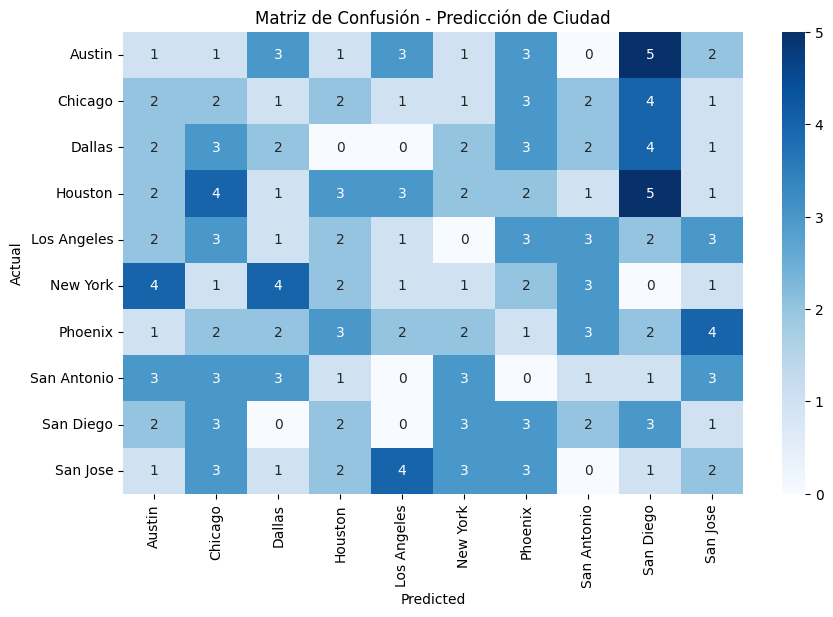

In [15]:
# 9. Matriz de confusión
plt.figure(figsize=(10,6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=le_location.classes_, yticklabels=le_location.classes_, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matriz de Confusión - Predicción de Ciudad')
plt.show()

la pregunta se debe cambiar a:
### ¿El pedido proviene de una ciudad del estado de Texas?